**DDOS ATTACK DETECTION (Wednesday-WorkingHours.pcap_ICSX.csv)**

# **Project Initializaon and Dataset Acquision**

In [1]:
from google.colab import drive
drive.mount('/content/drive') #mounting to the drive to access the dataset

Mounted at /content/drive


 ***1.Define project goals and expected outcomes***

PROJECT GOAL :
To create an intelligent, automated system that proactively detectsBDDoS attacks in real-time, ensuring high service availability and network security.

EXPECTED OUTCOMES :

1.A trained machine learning model that classifies network traffic as either benign or DDoS with over 99% accuracy and a false positive rate under 0.5%.

2.A deployed real-time detection engine that analyzes live network traffic with a latency of less than 200 milliseconds.

3.A performance dashboard displaying real-time traffic status, attack alerts, and all automated mitigation(damage) actions by the end of Q1 2026.

***2.Download and explore the NSL-KDD or CICIDS2017 dataset***

The Dataset used in this project is CICIDS2017, obtained from the official source of the Canadian Institute for Cybersecurity. Dataset:https://www.unb.ca/cic/datasets/ids-2017.html

***3.Understand dataset structure and attack types.***

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path) #it reads the dataset from the drive

In [6]:
df #it shows the data in the dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
# Inspect the data
print("Inspecting the updated df DataFrame:")
display(df.info()) #it shows the information about the dataset


Inspecting the updated df DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Pa

None

In [8]:
print("Shape of the DataFrame:")
display(df.shape) # shape shows number of rows and columns in the dataset

Shape of the DataFrame:


(692703, 79)

In [9]:
print("Unique attack types in the 'Label' column:")
display(df[' Label'].unique())

Unique attack types in the 'Label' column:


array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

***4.Perform basic statistics and data validation***

In [10]:
print("\nDescriptive statistics for numerical columns:")
display(df.describe())
#describe() shows the count, mean,standard, minimum,25%,50%,75% and maximum values of the dataset


Descriptive statistics for numerical columns:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [12]:
print("\nChecking for missing values:")
display(df.isnull().sum()) #it shows null values if any there


Checking for missing values:


,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [13]:
#checking for the duplicate values
display(df.duplicated().sum())

np.int64(81909)

# ***Data Cleaning and Preprocessing***

***1.Handle missing values, duplicates, and irrelevant features***

In [15]:
# HANDLING MISSING VALUES
# Select only numerical columns
numeric_cols = df.select_dtypes(include=np.number)
# Fill missing values with the median of each numerical column
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())
print("Number of missing values after filling:")
display(df.isnull().sum().sum())

Number of missing values after filling:


np.int64(0)

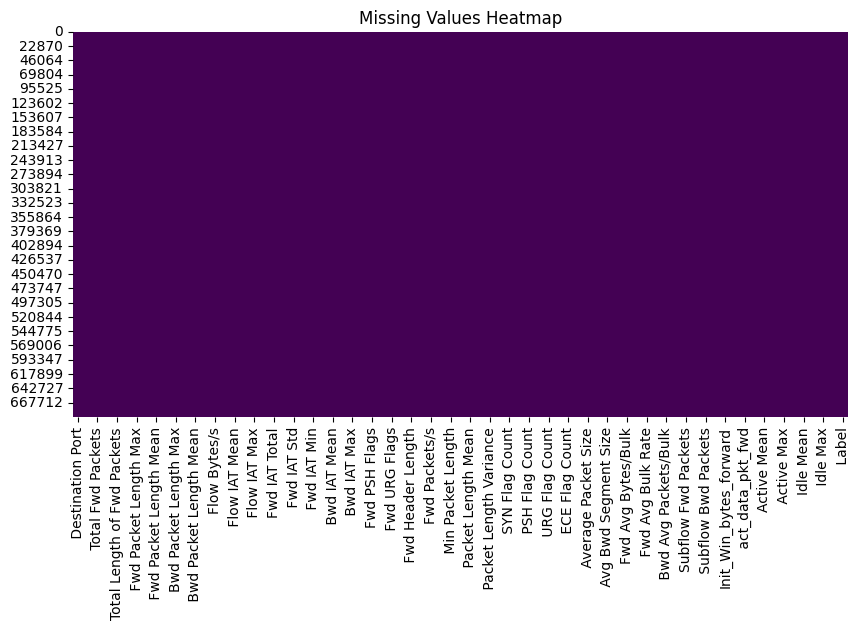

In [17]:
# VISUALIZING MISSING VALUES
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [16]:
# HANDLING DUPLICATE VALUES
initial_rows = df.shape[0]
print(f"Initial number of rows: {initial_rows}")
duplicate_rows = df.duplicated().sum() # checking for duplicated rows
print(f"Number of duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True) #deleting the duplicate rows
rows_after_dropping = df.shape[0]
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
duplicate_rows_after_dropping = df.duplicated().sum() #sum of duplicate rows after dropping
print(f"Number of duplicate rows after dropping: {duplicate_rows_after_dropping}")

Initial number of rows: 610794
Number of duplicate rows: 0
Number of rows after dropping duplicates: 610794
Number of duplicate rows after dropping: 0


In [19]:
# IDENTIFYING IRRELEVANT FEATURES
print("Analyze the unique values in each column to identify potentially irrelevant features based on cardinality.")
unique_counts = df.nunique()
print("Number of unique values for each column:")
display(unique_counts)

# Identify columns with high cardinality (e.g., more than 90% unique values)
high_cardinality_cols = unique_counts[unique_counts / len(df) > 0.9].index.tolist()
print("\nColumns with high cardinality:")
display(high_cardinality_cols)

# Identify columns with very low cardinality (e.g., 1 or 2 unique values)
low_cardinality_cols = unique_counts[unique_counts <= 2].index.tolist()
print("\nColumns with low cardinality:")
display(low_cardinality_cols)

Analyze the unique values in each column to identify potentially irrelevant features based on cardinality.
Number of unique values for each column:


,0
Destination Port,30094
Flow Duration,363185
Total Fwd Packets,685
Total Backward Packets,859
Total Length of Fwd Packets,9380
...,...
Idle Mean,37601
Idle Std,41528
Idle Max,21986
Idle Min,43869



Columns with high cardinality:


[]


Columns with low cardinality:


['Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

Based on the identified columns with high and low cardinality, and a general understanding of network traffic data, I will identify the irrelevant features. Some columns with low cardinality might still be relevant if they represent important flags or binary states. Columns with extremely high cardinality that are not identifiers or timestamps are likely irrelevant for a general botnet detection model. After identifying the irrelevant columns, I will drop them from the DataFrame

In [22]:
# HANDLING IRRELAVENT FEATURES
# Define irrelevant features based on the analysis of unique values and domain knowledge
# These are columns with very low or very high cardinality that are unlikely to be useful for the model
irrelevant_features = low_cardinality_cols + high_cardinality_cols

# Add other potentially irrelevant features based on column names and common practices in similar datasets
# For example, features that are identifiers or have constant values
irrelevant_features.extend([
    'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate',
    ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    # 'Fwd Header Length.1' # Removed as it caused an error
])

# Ensure no duplicate column names in the list
irrelevant_features = list(set(irrelevant_features))

print("Irrelevant features identified:")
display(irrelevant_features)

# Drop the irrelevant features
df_cleaned = df.drop(columns=irrelevant_features)

print("\nShape of the DataFrame after dropping irrelevant features:")
display(df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

Irrelevant features identified:


['Bwd Avg Bulk Rate',
 'Fwd PSH Flags',
 'Fwd Avg Bytes/Bulk',
 ' CWE Flag Count',
 ' Fwd Avg Packets/Bulk',
 ' SYN Flag Count',
 ' ACK Flag Count',
 ' ECE Flag Count',
 ' PSH Flag Count',
 ' Fwd Avg Bulk Rate',
 ' Fwd URG Flags',
 ' Bwd PSH Flags',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 ' URG Flag Count',
 'FIN Flag Count',
 ' RST Flag Count',
 ' Bwd URG Flags']


Shape of the DataFrame after dropping irrelevant features:


(610794, 61)


First 5 rows of the cleaned DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN




19 columns were identified as irrelevant and dropped from the dataset.
Columns with very low cardinality (1 or 2 unique values) were removed as they provide little discriminative information.The DataFrame shape after dropping the irrelevant columns is (610794, 61).

***2.Convert categorical features using encoding techniques.***

In [31]:
#OUTLIERS
# Identify outliers using the IQR method for numerical columns in df1
numerical_cols_df1 = df_cleaned.select_dtypes(include=np.number).columns.tolist()

outlier_indices = {}
for col in numerical_cols_df1:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].index
    outlier_indices[col] = outliers

print("Number of outliers identified per numerical column (using IQR):")
for col, indices in outlier_indices.items():
    print(f"{col}: {len(indices)}")

Number of outliers identified per numerical column (using IQR):
 Destination Port: 81971
 Flow Duration: 0
 Total Fwd Packets: 42786
 Total Backward Packets: 40418
Total Length of Fwd Packets: 64359
 Total Length of Bwd Packets: 10046
 Fwd Packet Length Max: 25279
 Fwd Packet Length Min: 3186
 Fwd Packet Length Mean: 58202
 Fwd Packet Length Std: 20908
Bwd Packet Length Max: 2682
 Bwd Packet Length Min: 29221
 Bwd Packet Length Mean: 1
 Bwd Packet Length Std: 7759
Flow Bytes/s: 136665
 Flow Packets/s: 137829
 Flow IAT Mean: 10181
 Flow IAT Std: 3329
 Flow IAT Max: 0
 Flow IAT Min: 106821
Fwd IAT Total: 0
 Fwd IAT Mean: 13915
 Fwd IAT Std: 18139
 Fwd IAT Max: 0
 Fwd IAT Min: 137230
Bwd IAT Total: 135621
 Bwd IAT Mean: 133953
 Bwd IAT Std: 125469
 Bwd IAT Max: 135358
 Bwd IAT Min: 72624
 Fwd Header Length: 29376
 Bwd Header Length: 31268
Fwd Packets/s: 139977
 Bwd Packets/s: 119136
 Min Packet Length: 2711
 Max Packet Length: 2766
 Packet Length Mean: 92
 Packet Length Std: 791
 Packet L

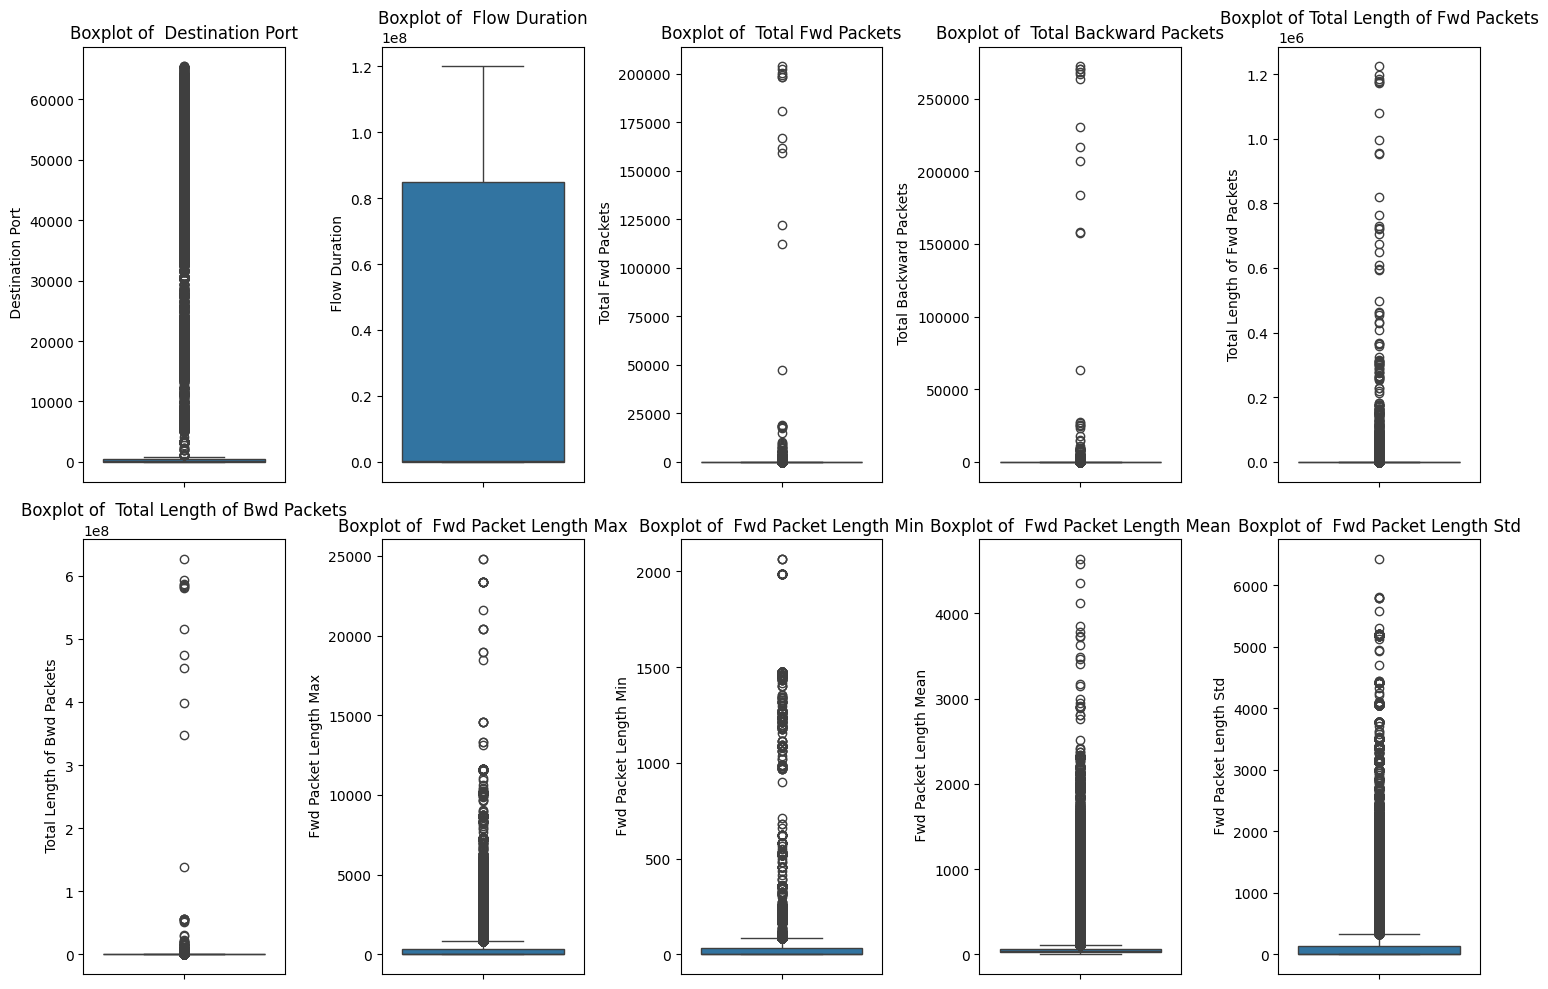

In [32]:
# BOXPLOT OF OUTLIERS
# Select numerical columns from df1 for outlier visualization
numerical_cols_df1 = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Plot boxplots for a subset of numerical columns to visualize outliers
num_plots = min(len(numerical_cols_df1), 10)  # Limit the number of plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_df1[:num_plots]):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [25]:
# NUMERICAL FEATURES
print("Numerical features in the cleaned DataFrame:")
numerical_features = df_cleaned.select_dtypes(include=np.number)
display(numerical_features.head())

Numerical features in the cleaned DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0


In [27]:
# CATEGORICAL FEATURES
print("Categorical features in the cleaned DataFrame:")
categorical_features = df_cleaned.select_dtypes(include='object')
display(categorical_features.head())

Categorical features in the cleaned DataFrame:


,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN


In [29]:
# ENCODING
print("Encoding")
from sklearn.preprocessing import LabelEncoder

# Convert categorical features using encoding techniques.
print("Converting categorical features using encoding techniques:")

# Apply Label Encoding to the 'Label' column as it is the target variable
label_encoder = LabelEncoder()
df_cleaned['Label_encoded'] = label_encoder.fit_transform(df_cleaned[' Label'])

print("\nValue counts for the original ' Label' column:")
display(df_cleaned[' Label'].value_counts())

print("\nValue counts for the new 'Label_encoded' column:")
display(df_cleaned['Label_encoded'].value_counts())

# Display the first few rows with the new encoded column
print("\nFirst 5 rows of the DataFrame with the encoded label:")
display(df_cleaned.head())

Encoding
Converting categorical features using encoding techniques:

Value counts for the original ' Label' column:


,count
Label,
BENIGN,417035
DoS Hulk,172849
DoS GoldenEye,10286
DoS slowloris,5385
DoS Slowhttptest,5228
Heartbleed,11



Value counts for the new 'Label_encoded' column:


,count
Label_encoded,
0,417035
2,172849
1,10286
4,5385
3,5228
5,11



First 5 rows of the DataFrame with the encoded label:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_encoded
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


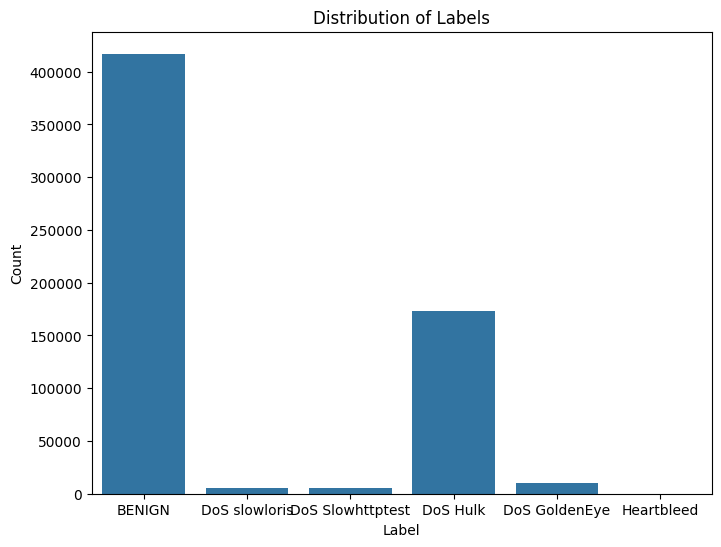

In [35]:
# Visualize the distribution of the target variable 'Label'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x=' Label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

***3.Normalize or standardize numerical features.***

In [38]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling, excluding the encoded label
numerical_cols_to_scale = df_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_scale.remove('Label_encoded')

print(f"Numerical columns to be scaled: {numerical_cols_to_scale}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns
df_cleaned[numerical_cols_to_scale] = scaler.fit_transform(df_cleaned[numerical_cols_to_scale])

print("\nFirst 5 rows of the DataFrame after standardization:")
display(df_cleaned.head())

Numerical columns to be scaled: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Sub

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_encoded
0,-0.382581,-0.717242,-0.012008,-0.010059,-0.094488,-0.008073,-0.404279,-0.234917,-0.374758,-0.393591,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
1,-0.363970,-0.718098,0.000559,-0.006243,-0.069184,-0.007938,-0.289520,-0.384893,-0.315539,-0.261816,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
2,-0.382099,-0.718084,-0.000698,-0.005289,0.384750,-0.006755,2.062250,-0.384893,1.524160,2.256898,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
3,-0.363970,-0.717765,0.008100,0.000436,0.430784,-0.005285,1.650376,-0.384893,0.836240,1.390459,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
4,-0.382099,-0.718084,-0.001954,-0.005289,0.384750,-0.006754,2.062250,-0.384893,1.739247,2.516466,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0


In [37]:
# Check for infinite values
infinite_values = df_cleaned.isin([np.inf, -np.inf]).sum()
print("Infinite values per column:")
display(infinite_values[infinite_values > 0])

# Replace infinite values with NaN and then fill NaN with median
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining missing values (originally infinite) with the median of each column
for col in numerical_cols_to_scale:
    if df_cleaned[col].isnull().any():
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)

print("\nNumber of missing values after handling infinities and filling with median:")
display(df_cleaned.isnull().sum().sum())

# Now apply StandardScaler again
scaler = StandardScaler()
df_cleaned[numerical_cols_to_scale] = scaler.fit_transform(df_cleaned[numerical_cols_to_scale])

print("\nFirst 5 rows of the DataFrame after handling infinities and standardization:")
display(df_cleaned.head())

Infinite values per column:


,0
Flow Bytes/s,241
Flow Packets/s,302



Number of missing values after handling infinities and filling with median:


np.int64(0)


First 5 rows of the DataFrame after handling infinities and standardization:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_encoded
0,-0.382581,-0.717242,-0.012008,-0.010059,-0.094488,-0.008073,-0.404279,-0.234917,-0.374758,-0.393591,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
1,-0.363970,-0.718098,0.000559,-0.006243,-0.069184,-0.007938,-0.289520,-0.384893,-0.315539,-0.261816,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
2,-0.382099,-0.718084,-0.000698,-0.005289,0.384750,-0.006755,2.062250,-0.384893,1.524160,2.256898,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
3,-0.363970,-0.717765,0.008100,0.000436,0.430784,-0.005285,1.650376,-0.384893,0.836240,1.390459,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0
4,-0.382099,-0.718084,-0.001954,-0.005289,0.384750,-0.006754,2.062250,-0.384893,1.739247,2.516466,...,-0.140358,-0.106988,-0.15856,-0.111225,-0.632052,-0.112634,-0.63806,-0.621565,BENIGN,0


***4.Split the dataset into training and testing sets.***

In [39]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop(columns=[' Label', 'Label_encoded']) # Drop original and encoded label columns
y = df_cleaned['Label_encoded']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (488635, 60)
Shape of X_test: (122159, 60)
Shape of y_train: (488635,)
Shape of y_test: (122159,)


In [42]:
# Define the path to save the encoded dataset in your Google Drive
output_path_encoded = '/content/drive/MyDrive/encoded_wednesday_dataset.csv'

# Save the encoded DataFrame to a CSV file
df_cleaned.to_csv(output_path_encoded, index=False)

print(f"Encoded dataset saved to: {output_path_encoded}")

Encoded dataset saved to: /content/drive/MyDrive/encoded_wednesday_dataset.csv
